#EXERCISE 5.1

###Sampling the hydrogen atom using the Metropolis Algorithm

The objective is to sample to sample the ground state pdf $|\Psi_{1,0,0}(x,y,z)|^2$ and the excited 2p pdf $|\Psi_{2,1,0}(x,y,z)|^2$ in Cartesian coordinates, where:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}
$$

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

To do so, Metropolis' algorithm is used: given an intial position in space $X_0$, the algorithm:



1.   Proposes a step from the previous position $x$ to the position $x'$ according to the probability $T(x'|x)$.
2.   Evaluate $P(x')/P(x)$: if it is > 1, the step is accepted, else the step is accepted with probability $P(x')/P(x)$.
3.   If the step is accepted  $x\leftarrow x'$, and repeat from 1 a number $n_{steps}$ of steps

Doing so, the accepted points are distributed according to $P(x)$ (the squared wavefunction in the exercise)

In order to avoid dependence from the initial condition, the algorithm runs $n_{eq}$ steps before actually starting to store the computed steps. I chose $n_{eq} = 0.5 n_{steps}$



/tmp/ipython-input-3-1822202955.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ground = pd.read_csv('H_ground_samples.dat', delim_whitespace=True, header=None, names=['x', 'y', 'z'])
/tmp/ipython-input-3-1822202955.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_p2 = pd.read_csv('H_2p_samples.dat', delim_whitespace=True, header=None, names=['x', 'y', 'z'])


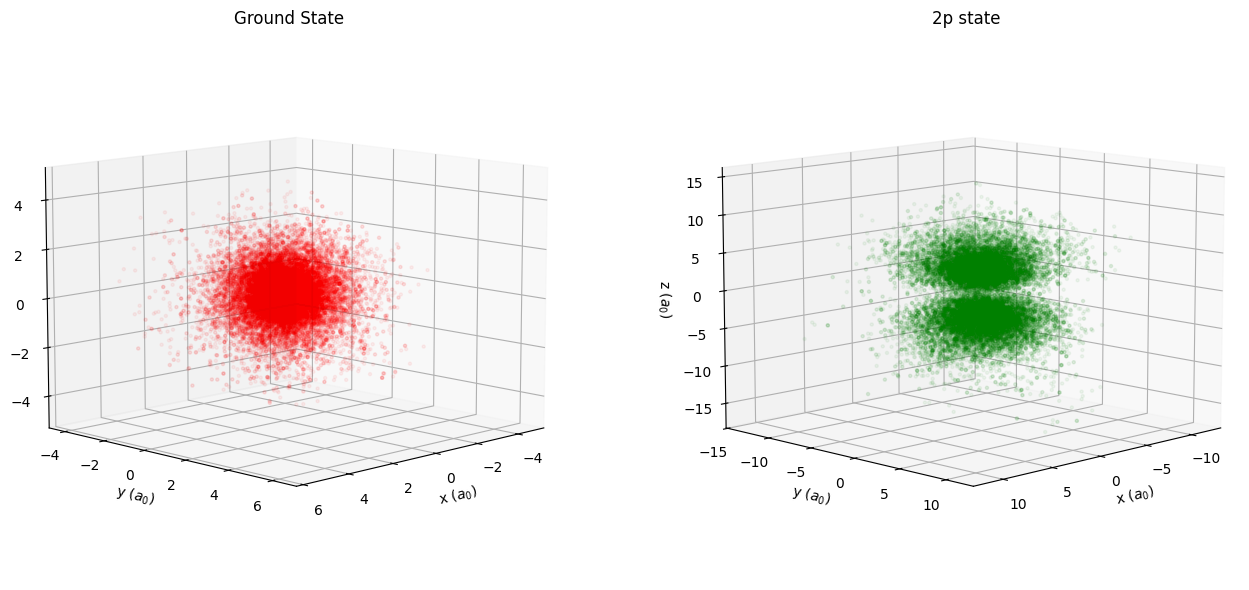

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bohr radius
a0 = 0.0529

#data:
df_ground = pd.read_csv('H_ground_samples.dat', delim_whitespace=True, header=None, names=['x', 'y', 'z'])
df_p2 = pd.read_csv('H_2p_samples.dat', delim_whitespace=True, header=None, names=['x', 'y', 'z'])

#plot:
fig = plt.figure(figsize=(14, 6))

# --- ground state ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df_ground['x']/a0, df_ground['y']/a0, df_ground['z']/a0, color='red', alpha=0.05, s=5)
ax1.set_title('Ground State')
ax1.set_xlabel('x $ (a_0)$')
ax1.set_ylabel('y $ (a_0)$')
ax1.set_zlabel('z $ (a_0)$')
ax1.view_init(elev=10, azim=45)

# --- 2p state ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df_p2['x']/a0, df_p2['y']/a0, df_p2['z']/a0, color='green', alpha=0.05, s=5)
ax2.set_title('2p state')
ax2.set_xlabel(r'x $ (a_0)$')
ax2.set_ylabel('y $ (a_0)$')
ax2.set_zlabel('z $ (a_0)$')
ax2.view_init(elev=10, azim=45)

plt.tight_layout()
plt.show()

Looking at the accepted points, we see the characteristic atomic orbitals.

We can now compute the expected radius $\left\langle r \right\rangle_{\Psi_{n,l,m}}$, knowing the exact solution:

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

This has been done two ways:

*   Choosing $T(x'|x)$ as a uniform transition probability to make a step of lenght $\in [0, L)$ in each coordinate
*   Choosing $T(x'|x)$ as a  multivariate normal transition probability, choosing the each next coordinate with gaussian probability centered on the previous coordinate.

Acceptance has been tweaked to be $\in [0.4;0.5]$ by fine tuning the algorithm.

As a starting point, i chose $(a_0,0,0)$. Starting too far from the origin, and given the higher probability around there, the algorithm swiftly moves towards it, therefore oversampling the low probability points it must pass through to get there. The farther it starts, the more these points' frequency will be wrong.

I used 1000000 samples subdivided in 100 blocks. I did not see any correlation effect at this scale, so I can judge 10000 a good number of points per block.

/tmp/ipython-input-12-757253783.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ground = pd.read_csv('r_ground_state_uniform.dat', delim_whitespace=True, header=None, names=['r', 'error'])
/tmp/ipython-input-12-757253783.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_2p = pd.read_csv('r_2p_state_uniform.dat', delim_whitespace=True, header=None, names=['r', 'error'])
/tmp/ipython-input-12-757253783.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ground = pd.read_csv('r_ground_state_gauss.dat', delim_whitespace=True, header=None, names=['r', 'error'])
/tmp/ipython-input-12-757253783.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be r

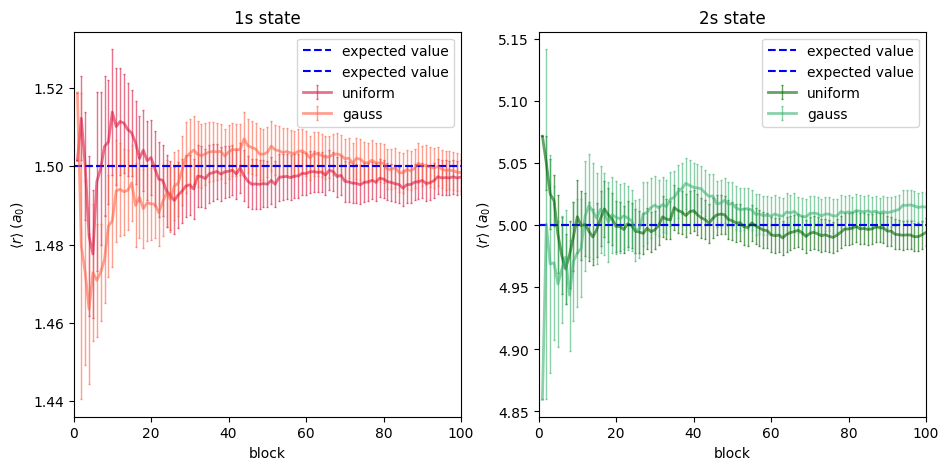

In [12]:
#Bohr radius
a0 = 0.0529


#data:
df_ground = pd.read_csv('r_ground_state_uniform.dat', delim_whitespace=True, header=None, names=['r', 'error'])
df_2p = pd.read_csv('r_2p_state_uniform.dat', delim_whitespace=True, header=None, names=['r', 'error'])
steps = np.arange(1, len(df_ground)+1)


#plot:
fig, ax = plt.subplots(1, 2, figsize=(11, 5), sharex=True)

ax[0].errorbar(steps, df_ground['r']/a0,yerr=df_ground['error']/a0, color = 'crimson', label="uniform", capsize=1, linewidth=2, elinewidth=1, alpha = 0.6)
ax[0].set(title="1s state", xlabel='block',  ylabel=r'$\langle r \rangle$ $(a_0)$')
ax[0].grid()
ax[0].set_xlim(0, len(df_2p))
ax[0].axhline(1.5, color = 'blue', linestyle = '--', label = 'expected value')
ax[0].legend()

ax[1].errorbar(steps, df_2p['r']/a0, yerr=df_2p['error']/a0, color = 'darkgreen', label="uniform", capsize=1, linewidth=2, elinewidth=1, alpha = 0.6)
ax[1].set(title='2s state', xlabel='block',  ylabel=r'$\langle r \rangle$ $(a_0)$')
ax[1].grid()
ax[1].set_xlim(0, len(df_2p))
ax[1].axhline(5, color = 'blue', linestyle = '--', label = 'expected value')
ax[1].legend()


#non uniform:

#data:
df_ground = pd.read_csv('r_ground_state_gauss.dat', delim_whitespace=True, header=None, names=['r', 'error'])
df_2p = pd.read_csv('r_2p_state_gauss.dat', delim_whitespace=True, header=None, names=['r', 'error'])
steps = np.arange(1, len(df_ground)+1)


#plot:
ax[0].errorbar(steps, df_ground['r']/a0,yerr=df_ground['error']/a0, color = 'tomato', label="gauss", capsize=1, linewidth=2, elinewidth=1, alpha = 0.6)
ax[0].set(title="1s state", xlabel='block',  ylabel=r'$\langle r \rangle$ $(a_0)$')
ax[0].grid()
ax[0].set_xlim(0, len(df_2p))
ax[0].axhline(1.5, color = 'blue', linestyle = '--', label = 'expected value')
ax[0].legend()

ax[1].errorbar(steps, df_2p['r']/a0, yerr=df_2p['error']/a0, color = 'mediumseagreen', label="gauss", capsize=1, linewidth=2, elinewidth=1, alpha = 0.6)
ax[1].set(title='2s state', xlabel='block',  ylabel=r'$\langle r \rangle$ $(a_0)$')
ax[1].grid()
ax[1].set_xlim(0, len(df_2p))
ax[1].axhline(5, color = 'blue', linestyle = '--', label = 'expected value')
ax[1].legend()


The results are in accord with the exact solution, and I did not see any significant difference between the two methods.